In [2]:
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [4]:
train_dataset = load_dataset("OhWayTee/hierarchy-pairs2", split="train")
test_dataset = load_dataset("OhWayTee/hierarchy-pairs2", split="test")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [6]:
model = BertForSequenceClassification.from_pretrained("OhWayTee/bert-taxonomy2")

In [7]:
trainer = Trainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

/tmp/ipython-input-7-1510501462.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
predictions = trainer.predict(test_dataset)
pred_labels = predictions.predictions.argmax(-1)  # Convert logits to labels
true_labels = test_dataset['label']

In [9]:
accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9139
Precision: 0.9141
Recall: 0.9139
F1 Score: 0.9136


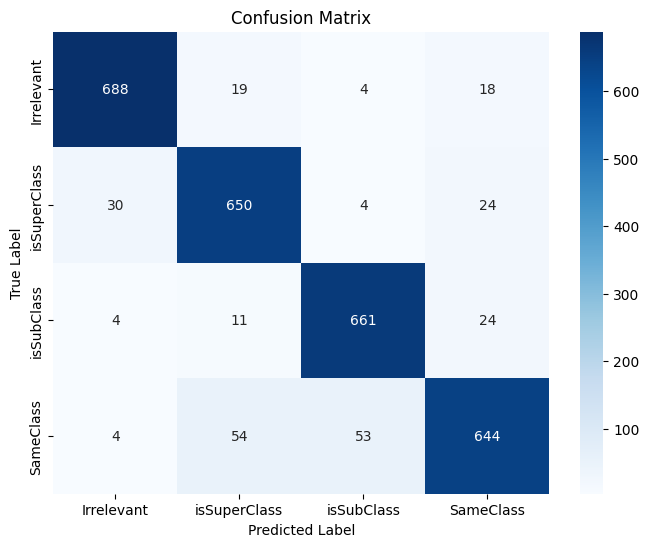

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(8, 6))
label_map = {
    "Irrelevant": 0,
    "isSuperClass": 1,
    "isSubClass": 2,
    "SameClass": 3
}
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()